In [3]:
import keras
from keras import layers

# create the layers of the model
input_vector = keras.Input(shape=(784,))
encoded = layers.Dense(32, activation='relu')(input_vector)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# create the model mapping the input and its reconstruction
autoencoder = keras.Model(input_vector, decoded)
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [4]:
# create a model for the encoder
encoder = keras.Model(input_vector, encoded)

# and one for the decoder
encoded_input = keras.Input(shape=(32,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

# now we compile the model with the optimizer and loss
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [6]:
from keras.datasets import mnist
import numpy as np

# load mnist data
(x_train, _), (x_test, _) = mnist.load_data()

# we now normalize the data and flatten the images from 28x28 to 784
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [7]:
# and now we train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 3s 10ms/step - loss: 0.2749 - val_loss: 0.1877
Epoch 2/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1694 - val_loss: 0.1527
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1438 - val_loss: 0.1335
Epoch 4/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1285 - val_loss: 0.1214
Epoch 5/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1184 - val_loss: 0.1129
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1113 - val_loss: 0.1071
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1062 - val_loss: 0.1028
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1024 - val_loss: 0.0997
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0996 - val_loss: 0.0973
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0978 - val_loss: 0.09

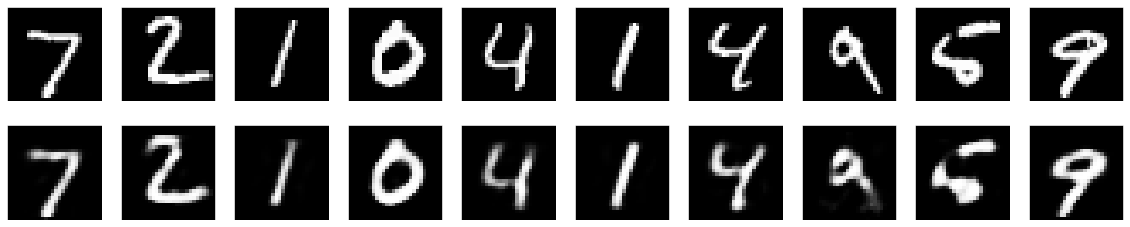

In [8]:
import matplotlib.pyplot as plt

# for the test set, we now encode and decode some images
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [11]:
decoded_imgs.shape

(10000, 784)